### Разведывательный анализ данных

Задание:
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 


Порядок выполнения задания:

- Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Описание датасета:

- 1 school — аббревиатура школы, в которой учится ученик

- 2 sex — пол ученика ('F' - женский, 'M' - мужской)

- 3 age — возраст ученика (от 15 до 22)

- 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

- 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

- 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

- 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

- 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

- 16 schoolsup — дополнительная образовательная поддержка (yes или no)

- 17 famsup — семейная образовательная поддержка (yes или no)

- 18 paid — дополнительные платные занятия по математике (yes или no)

- 19 activities — дополнительные внеучебные занятия (yes или no)

- 20 nursery — посещал детский сад (yes или no)

- 21 higher — хочет получить высшее образование (yes или no)

- 22 internet — наличие интернета дома (yes или no)

- 23 romantic — в романтических отношениях (yes или no)

- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

- 28 absences — количество пропущенных занятий

- 29 score — баллы по госэкзамену по математике

In [3]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'studytime_g', 'higher', 'internet', 'romantic', 'fam_rel',
                'freetime', 'go_out', 'health', 'absences', 'score']

## Обработка и очистка таблицы
### Отсутствующие данные

In [5]:
# удаляем из выборки столбец 'studytime, granular', который я переименовал в 'studytime_g',
# т.к. про него в задании ничего не сказано и непонятно что это такое

cols_to_drop = ['studytime_g']
stud = stud.drop(cols_to_drop, axis=1)

In [6]:
display(stud.head(10))
stud.info()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   fam_size    368 non-null    object 
 5   p_status    350 non-null    object 
 6   m_edu       392 non-null    float64
 7   f_edu       371 non-null    float64
 8   m_job       376 non-null    object 
 9   f_job       359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [7]:
# отбор числовых колонок

stud_numeric = stud.select_dtypes(include=[np.number])
numeric_cols = stud_numeric.columns.values
print(numeric_cols)

['age' 'm_edu' 'f_edu' 'traveltime' 'studytime' 'failures' 'fam_rel'
 'freetime' 'go_out' 'health' 'absences' 'score']


In [8]:
# отбор категориальных колонок

stud_non_numeric = stud.select_dtypes(exclude=[np.number])
non_numeric_cols = stud_non_numeric.columns.values
print(non_numeric_cols)

['school' 'sex' 'address' 'fam_size' 'p_status' 'm_job' 'f_job' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


In [9]:
# Создаем функцию по очистке категориальных признаков, в случае если она понадобится

def fix_cat(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    return x

In [10]:
# Процентный список пропущенных данных

for col in stud.columns:
    pct_missing = np.mean(stud[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
fam_size - 7.0%
p_status - 11.0%
m_edu - 1.0%
f_edu - 6.0%
m_job - 5.0%
f_job - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
fam_rel - 7.0%
freetime - 3.0%
go_out - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


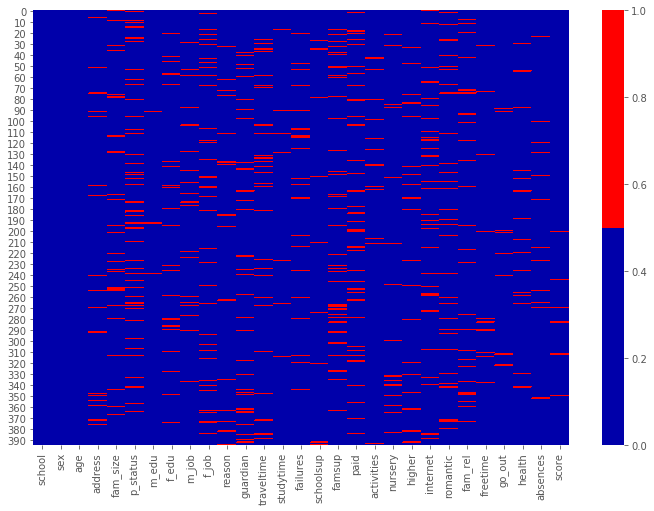

In [11]:
# Тепловая карта пропусков

cols = stud.columns
# определяем цвета
# красный - пропущенные данные, синий - не пропущенные
colours = ['#0000aa', '#ff0000']
sns.heatmap(stud[cols].isnull(), cmap=sns.color_palette(colours))

created missing indicator for: address
created missing indicator for: fam_size
created missing indicator for: p_status
created missing indicator for: m_edu
created missing indicator for: f_edu
created missing indicator for: m_job
created missing indicator for: f_job
created missing indicator for: reason
created missing indicator for: guardian
created missing indicator for: traveltime
created missing indicator for: studytime
created missing indicator for: failures
created missing indicator for: schoolsup
created missing indicator for: famsup
created missing indicator for: paid
created missing indicator for: activities
created missing indicator for: nursery
created missing indicator for: higher
created missing indicator for: internet
created missing indicator for: romantic
created missing indicator for: fam_rel
created missing indicator for: freetime
created missing indicator for: go_out
created missing indicator for: health
created missing indicator for: absences
created missing indicat

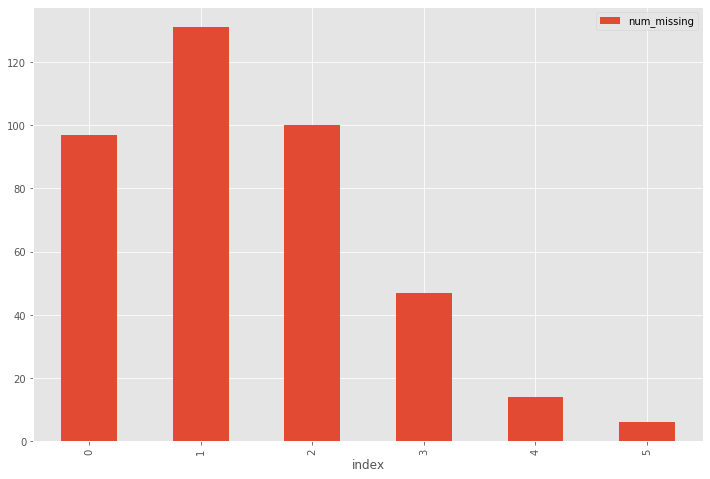

In [12]:
# гистограмма пропущенных данных

for col in stud.columns:
    missing = stud[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        stud['{}_ismissing'.format(col)] = missing

# затем на основе индикатора строим гистограмму

ismissing_cols = [col for col in stud.columns if 'ismissing' in col]
stud['num_missing'] = stud[ismissing_cols].sum(axis=1)

stud['num_missing'].value_counts().reset_index().sort_values(
    by='index').plot.bar(x='index', y='num_missing')

In [13]:
# Оставим эталонную таблицу в которой нет пропущенных значений в строке.
# отбрасываем строки с большим количеством пропусков

ind_missing = stud[stud['num_missing'] > 0].index
stud = stud.drop(ind_missing, axis=0)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school                97 non-null     object 
 1   sex                   97 non-null     object 
 2   age                   97 non-null     int64  
 3   address               97 non-null     object 
 4   fam_size              97 non-null     object 
 5   p_status              97 non-null     object 
 6   m_edu                 97 non-null     float64
 7   f_edu                 97 non-null     float64
 8   m_job                 97 non-null     object 
 9   f_job                 97 non-null     object 
 10  reason                97 non-null     object 
 11  guardian              97 non-null     object 
 12  traveltime            97 non-null     float64
 13  studytime             97 non-null     float64
 14  failures              97 non-null     float64
 15  schoolsup             97

In [14]:
# удаляем признаки для гистграммы пропущенных значений

for col in stud.columns:
    if 'missing' in col:
        del stud[col]
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   sex         97 non-null     object 
 2   age         97 non-null     int64  
 3   address     97 non-null     object 
 4   fam_size    97 non-null     object 
 5   p_status    97 non-null     object 
 6   m_edu       97 non-null     float64
 7   f_edu       97 non-null     float64
 8   m_job       97 non-null     object 
 9   f_job       97 non-null     object 
 10  reason      97 non-null     object 
 11  guardian    97 non-null     object 
 12  traveltime  97 non-null     float64
 13  studytime   97 non-null     float64
 14  failures    97 non-null     float64
 15  schoolsup   97 non-null     object 
 16  famsup      97 non-null     object 
 17  paid        97 non-null     object 
 18  activities  97 non-null     object 
 19  nursery     97 non-null     ob

### score 
баллы по госэкзамену по математике. Главный столбец относительно которого мы исследуем влияние остальных критериев (признаков)

In [15]:
#Посмотрим содержимое столбца.

pd.DataFrame(stud.score.value_counts(dropna=False))

,score
50.0,13
55.0,11
65.0,10
40.0,9
60.0,8
75.0,8
0.0,7
80.0,7
45.0,6
70.0,5


count    97.000000
mean     52.061856
std      21.049948
min       0.000000
25%      40.000000
50%      55.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

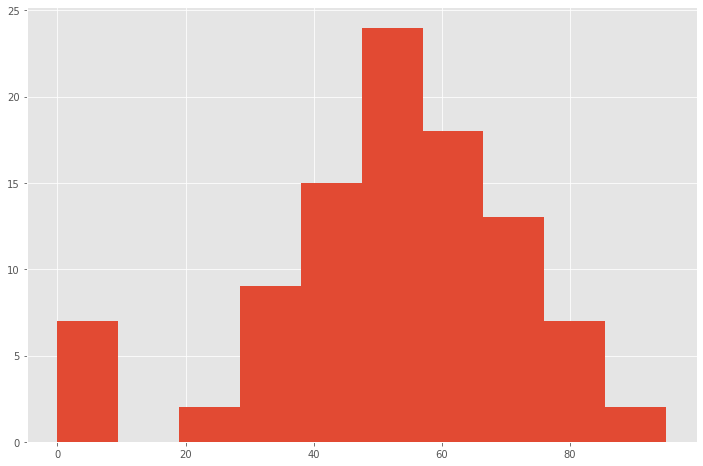

In [16]:
stud.score.hist()
stud.score.describe()

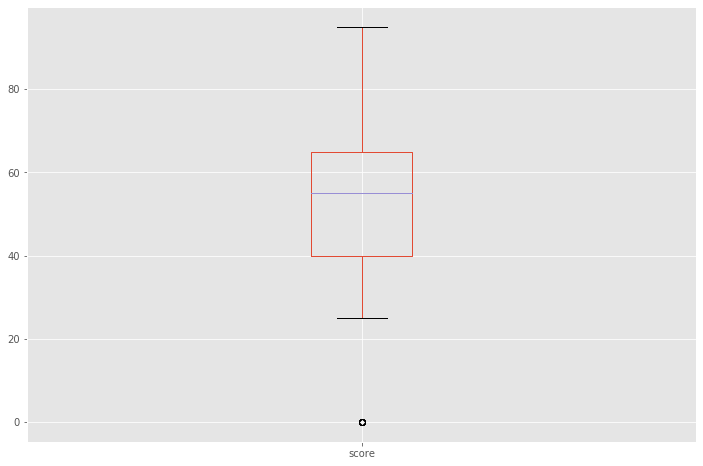

In [17]:
# уточняем на наличие выбросов

boxplot = stud.boxplot(column=['score'])

25й 40.0 75й 65.0 медиана= 55.0 IQR= 25.0 Разброс от 17.5 до 92.5


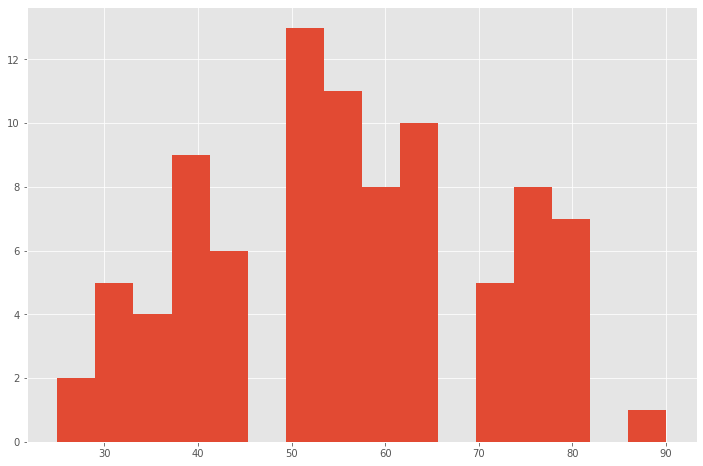

In [18]:
# удаляем выбросы

median_score = stud.score.median()
IQR_score = stud.score.quantile(0.75) - stud.score.quantile(0.25)
print('25й', stud.score.quantile(0.25), '75й', stud.score.quantile(0.75), 'медиана=', median_score, 'IQR=',
      IQR_score, 'Разброс от', median_score - 1.5*IQR_score, 'до', median_score + 1.5*IQR_score)
stud.score.loc[stud.score.between(
    median_score - 1.5*IQR_score, median_score + 1.5*IQR_score)].hist(bins=16, label='IQR')

In [19]:
# очищаем таблицу от выбросов

stud = stud.loc[stud.score.between(
    median_score - 1.5*IQR_score, median_score + 1.5*IQR_score)]
pd.DataFrame(stud.score.value_counts(dropna=False))

,score
50.0,13
55.0,11
65.0,10
40.0,9
60.0,8
75.0,8
80.0,7
45.0,6
70.0,5
30.0,5


In [20]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 4 to 391
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      89 non-null     object 
 1   sex         89 non-null     object 
 2   age         89 non-null     int64  
 3   address     89 non-null     object 
 4   fam_size    89 non-null     object 
 5   p_status    89 non-null     object 
 6   m_edu       89 non-null     float64
 7   f_edu       89 non-null     float64
 8   m_job       89 non-null     object 
 9   f_job       89 non-null     object 
 10  reason      89 non-null     object 
 11  guardian    89 non-null     object 
 12  traveltime  89 non-null     float64
 13  studytime   89 non-null     float64
 14  failures    89 non-null     float64
 15  schoolsup   89 non-null     object 
 16  famsup      89 non-null     object 
 17  paid        89 non-null     object 
 18  activities  89 non-null     object 
 19  nursery     89 non-null     ob

### School
аббревиатура школы, в которой учится ученик

In [21]:
#Посмотрим, сколько школ содержит наш датасет.

pd.DataFrame(stud.school.value_counts(dropna=False))

,school
GP,73
MS,16


In [22]:
round(stud.school.value_counts(' ')*100, 1)

GP    82.0
MS    18.0
Name: school, dtype: float64

82% учеников учится в школе под кодовым именени GP. Остальные в MS

### Sex

In [23]:
# смотрим содержимое столбца

pd.DataFrame(stud.sex.value_counts(dropna=False))

,sex
F,49
M,40


In [24]:
round(stud.sex.value_counts(' ')*100, 1)

F    55.1
M    44.9
Name: sex, dtype: float64

Более половины (55.1%) учеников это девочки.

### Age

In [25]:
# смотрим содержимое столбца 

pd.DataFrame(stud.age.value_counts(dropna=False))

,age
17,23
18,22
16,21
15,17
19,4
22,1
20,1


Пропущенных значений нет, но возможно есть выбросы

count    89.000000
mean     16.808989
std       1.338897
min      15.000000
25%      16.000000
50%      17.000000
75%      18.000000
max      22.000000
Name: age, dtype: float64

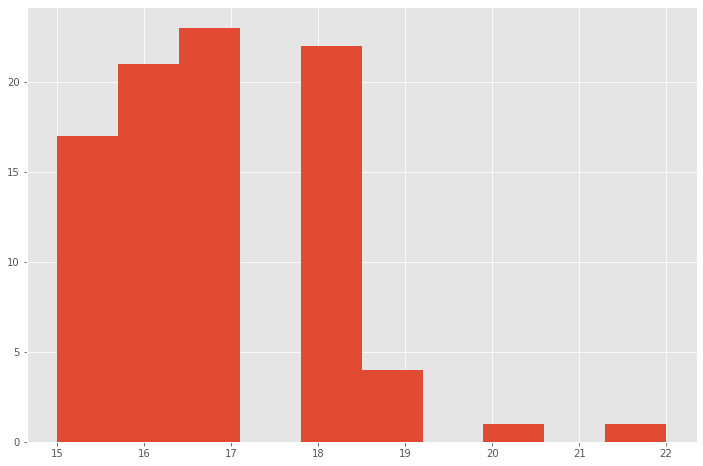

In [26]:
stud.age.hist()
stud.age.describe()

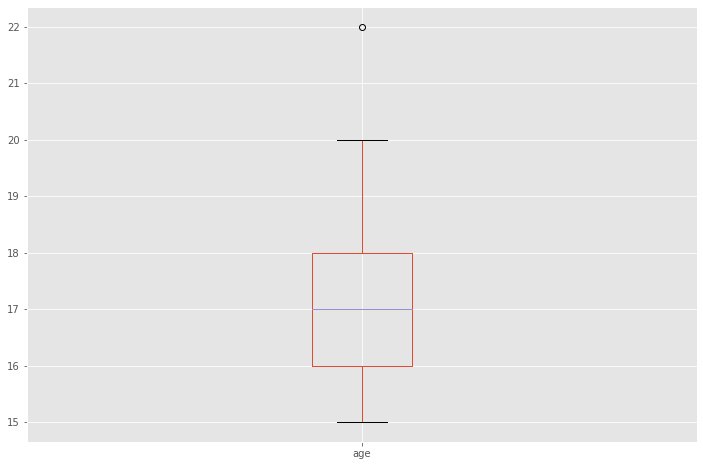

In [27]:
boxplot = stud.boxplot(column=['age'])

# присутствуют выбросы

In [28]:
# очистка от выбросов столбца age

median_age = stud.age.median()
IQR_age = stud.age.quantile(0.75) - stud.age.quantile(0.25)
stud = stud.loc[stud.age.between(
    median_age - 1.5*IQR_age, median_age + 1.5*IQR_age)]
pd.DataFrame(stud.age.value_counts(dropna=False))

,age
17,23
18,22
16,21
15,17
19,4
20,1


In [29]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 4 to 391
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      88 non-null     object 
 1   sex         88 non-null     object 
 2   age         88 non-null     int64  
 3   address     88 non-null     object 
 4   fam_size    88 non-null     object 
 5   p_status    88 non-null     object 
 6   m_edu       88 non-null     float64
 7   f_edu       88 non-null     float64
 8   m_job       88 non-null     object 
 9   f_job       88 non-null     object 
 10  reason      88 non-null     object 
 11  guardian    88 non-null     object 
 12  traveltime  88 non-null     float64
 13  studytime   88 non-null     float64
 14  failures    88 non-null     float64
 15  schoolsup   88 non-null     object 
 16  famsup      88 non-null     object 
 17  paid        88 non-null     object 
 18  activities  88 non-null     object 
 19  nursery     88 non-null     ob

### address
тип адреса ученика ('U' - городской, 'R' - за городом)

Из предыдущего анализа в этом столбце у нас есть 4% пропущенных значений

In [30]:
# смотрим содержимое столбца 

stud.address = stud.address.astype(str).apply(fix_cat)
pd.DataFrame(stud.address.value_counts(dropna=False))

,address
U,67
R,21


In [31]:
round(stud.address.value_counts(' ')*100, 1)

U    76.1
R    23.9
Name: address, dtype: float64

Большая часть учеников (76.1%) проживает в городе. 23.9% проживает за городом.

### fam_size
размер семьи('LE3' <= 3, 'GT3' >3)

Из предыдущего анализа в этом столбце у нас есть 7% пропущенных значений

In [32]:
# смотрим содержимое

pd.DataFrame(stud.fam_size.value_counts(dropna=False))

,fam_size
GT3,59
LE3,29


In [33]:
# считаем процентное соотношение

round(stud.fam_size.value_counts(' ')*100, 0)

GT3    67.0
LE3    33.0
Name: fam_size, dtype: float64

Большинство семей (67%) в выборке многодетные (от 4х детей), а 33% семей имеют до 3х детей.

### Pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно).

In [34]:
# смотрим содержимое

pd.DataFrame(stud.p_status.value_counts(dropna=False))

,p_status
T,78
A,10


In [35]:
# считаем процентное соотношение

round(stud.p_status.value_counts(' ')*100, 1)

T    88.6
A    11.4
Name: p_status, dtype: float64

У 88.6% учеников родители проживают совместно, а у 11.4% - раздельно.

### Medu 
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [36]:
# смотрим содержимое

pd.DataFrame(stud.m_edu.value_counts(dropna=False))

,m_edu
4.0,33
3.0,23
2.0,22
1.0,9
0.0,1


count    88.000000
mean      2.886364
std       1.066004
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: m_edu, dtype: float64

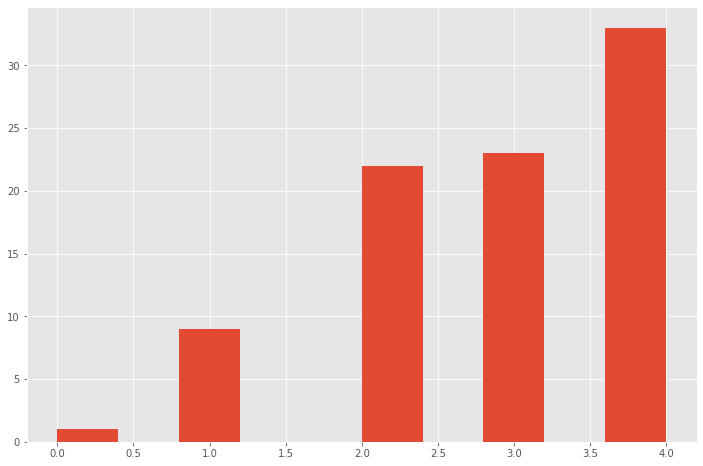

In [37]:
# посмотрим на распределение по категориям

stud.m_edu.hist()
stud.m_edu.describe()

In [38]:
# считаем процентное соотношение

round(stud.m_edu.value_counts(' ')*100, 1)

4.0    37.5
3.0    26.1
2.0    25.0
1.0    10.2
0.0     1.1
Name: m_edu, dtype: float64

Выбросов в выборке нет. У 37.9% учеников мамы имеют высшее образование. 10.3% мам закончили 4 класса, а 25.3% мам закончили 9 классов. 25.3% мам имеют законченную среднюю школу, либо среднеспециальное образование. При этом у почти 1% учеников мамы вообще не имеют образования.

### Fedu 
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [39]:
# смотрим содержимое

pd.DataFrame(stud.f_edu.value_counts(dropna=False))

,f_edu
2.0,24
4.0,23
3.0,22
1.0,19


count    88.000000
mean      2.556818
std       1.102327
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: f_edu, dtype: float64

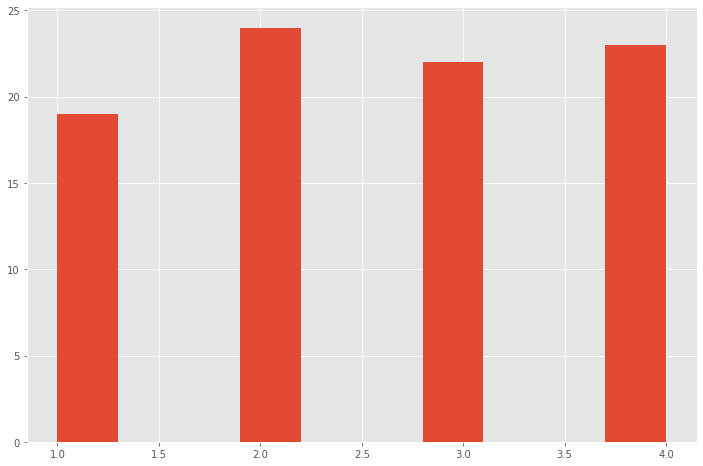

In [40]:
# посмотрим на распределение по категориям

stud.f_edu.hist()
stud.f_edu.describe()

Выбросов нет

In [41]:
# смотрим процентное соотношение

round(stud.f_edu.value_counts(' ')*100, 1)

2.0    27.3
4.0    26.1
3.0    25.0
1.0    21.6
Name: f_edu, dtype: float64

У 26.1% учеников папы имеют высшее образование. 21.6% пап закончили 4 класса, а 25% пап закончили 9 классов. 26.1% пап имеют законченную среднюю школу, либо среднеспециальное образование.

### Mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [42]:
# смотрим содержимое столбца

pd.DataFrame(stud.m_job.value_counts(dropna=False))

,m_job
other,38
services,20
teacher,12
health,9
at_home,9


In [43]:
# сторим процентное соотношение

round(stud.m_job.value_counts(' ')*100, 1)

other       43.2
services    22.7
teacher     13.6
health      10.2
at_home     10.2
Name: m_job, dtype: float64

13.6% мам работает учителями, 10.2% в сфере здравоохранения, 22.7% мам на госслужбе, 10.2% - не работает, 43.2% - занимается чем-то другим

### Fjob 
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [44]:
# смотрим содержимое столбца

pd.DataFrame(stud.f_job.value_counts(dropna=False))

,f_job
other,48
services,25
teacher,7
health,5
at_home,3


In [45]:
# сторим процентное соотношение

round(stud.f_job.value_counts(' ')*100, 1)

other       54.5
services    28.4
teacher      8.0
health       5.7
at_home      3.4
Name: f_job, dtype: float64

8% пап работает учителями, 5.7% в сфере здравоохранения, 28.4% пап на госслужбе, 3.4% - не работает, 54.5% - занимается чем-то другим

### reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [46]:
# смотрим содержимое столбца

pd.DataFrame(stud.reason.value_counts(dropna=False))

,reason
course,31
reputation,29
home,22
other,6


In [47]:
# сторим процентное соотношение

round(stud.reason.value_counts(' ')*100, 1)

course        35.2
reputation    33.0
home          25.0
other          6.8
Name: reason, dtype: float64

Ключевыми признаками выбора школы являлись:  программа (35.2%) и репутация (по 33%)

### guardian 
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [48]:
# смотрим содержимое столбца

pd.DataFrame(stud.guardian.value_counts(dropna=False))

,guardian
mother,62
father,19
other,7


In [49]:
# сторим процентное соотношение

round(stud.guardian.value_counts(' ')*100, 1)

mother    70.5
father    21.6
other      8.0
Name: guardian, dtype: float64

Большая часть опекунов являются матери (70.5%). Значение столбца не вполне понятно, очевидно, это тот кто каждый день занимается с ребенком по вопросам обучения. Неточности перевода и культурные различия.

### traveltime 
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [50]:
# смотрим содержимое столбца

pd.DataFrame(stud.traveltime.value_counts(dropna=False))

,traveltime
1.0,55
2.0,27
3.0,5
4.0,1


In [51]:
# сторим процентное соотношение

round(stud.traveltime.value_counts(' ')*100, 1)

1.0    62.5
2.0    30.7
3.0     5.7
4.0     1.1
Name: traveltime, dtype: float64

Подавляющее большинство детей добирается до школы менее, чем за 15 минут (62.5%). Следующий интервал (от 15-30 минут) у 30.7% детей. Однако есть дети которые тратят более часа на то, чтобы добраться в школу (1.1%).

### studytime 
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [52]:
# смотрим содержимое столбца

pd.DataFrame(stud.studytime.value_counts(dropna=False))

,studytime
2.0,44
1.0,21
3.0,16
4.0,7


In [53]:
# сторим процентное соотношение

round(stud.studytime.value_counts(' ')*100, 1)

2.0    50.0
1.0    23.9
3.0    18.2
4.0     8.0
Name: studytime, dtype: float64

Половина детей (50%) тратит от 2 до 5 часов в неделю на учебу вне школы. При этом менее 2х часов вне школы занимаются 23.9% детей. И 18.2% детей тратят от 5 до 10 часов в неделю на обучение вне школы.

### failures 
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [54]:
# смотрим содержимое столбца

pd.DataFrame(stud.failures.value_counts(dropna=False))

,failures
0.0,73
1.0,13
2.0,1
3.0,1


In [55]:
# сторим процентное соотношение

round(stud.failures.value_counts(' ')*100, 1)

0.0    83.0
1.0    14.8
2.0     1.1
3.0     1.1
Name: failures, dtype: float64

Большинство детей (83%) не испытывало внеучебных неудач (чтобы это не значило). 17% детей испытвало такие неудачи.

### schoolsup 
дополнительная образовательная поддержка (yes или no)

In [56]:
# смотрим содержимое столбца

pd.DataFrame(stud.schoolsup.value_counts(dropna=False))

,schoolsup
no,74
yes,14


In [57]:
# сторим процентное соотношение

round(stud.schoolsup.value_counts(' ')*100, 1)

no     84.1
yes    15.9
Name: schoolsup, dtype: float64

Подавляющее большинство детей (84.1%) не пользовалось дополнительной образовательной поддержкой.

### famsup 
семейная образовательная поддержка (yes или no)

In [58]:
# смотрим содержимое столбца

pd.DataFrame(stud.famsup.value_counts(dropna=False))

,famsup
yes,54
no,34


In [59]:
# сторим процентное соотношение

round(stud.famsup.value_counts(' ')*100, 1)

yes    61.4
no     38.6
Name: famsup, dtype: float64

Больше половины детей (61.4%) пользовались семейной образовательной поддержкой.

### paid
дополнительные платные занятия по математике (yes или no)

In [60]:
# смотрим содержимое столбца

pd.DataFrame(stud.paid.value_counts(dropna=False))

,paid
yes,46
no,42


In [61]:
# сторим процентное соотношение

round(stud.paid.value_counts(' ')*100, 1)

yes    52.3
no     47.7
Name: paid, dtype: float64

Более половины детей (52.3%) не использовали дополнительные платные занятия по математике.

### nursery 
посещал детский сад (yes или no)

In [62]:
# смотрим содержимое столбца

pd.DataFrame(stud.nursery.value_counts(dropna=False))

,nursery
yes,72
no,16


In [63]:
# сторим процентное соотношение

round(stud.nursery.value_counts(' ')*100, 1)

yes    81.8
no     18.2
Name: nursery, dtype: float64

Подавляющее большинство детей (81.8%) посещало детский сад

### higher 
хочет получить высшее образование (yes или no)

In [64]:
# смотрим содержимое столбца

pd.DataFrame(stud.higher.value_counts(dropna=False))

,higher
yes,86
no,2


In [65]:
# сторим процентное соотношение

round(stud.higher.value_counts(' ')*100, 1)

yes    97.7
no      2.3
Name: higher, dtype: float64

Подавляющее количество детей (97.7%) хочет получить высшее образование.

### internet 
наличие интернета дома (yes или no)

In [66]:
# смотрим содержимое столбца

pd.DataFrame(stud.internet.value_counts(dropna=False))

,internet
yes,76
no,12


In [67]:
# сторим процентное соотношение

round(stud.internet.value_counts(' ')*100, 1)

yes    86.4
no     13.6
Name: internet, dtype: float64

У значительной части (86.4%) детей есть интернет дома. 

### romantic 
в романтических отношениях (yes или no)

In [68]:
# смотрим содержимое столбца

pd.DataFrame(stud.romantic.value_counts(dropna=False))

,romantic
no,55
yes,33


In [69]:
# сторим процентное соотношение

round(stud.romantic.value_counts(' ')*100, 1)

no     62.5
yes    37.5
Name: romantic, dtype: float64

Только одна треть учеников (37.5%) состоит в романтических отношениях.

### famrel 
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [70]:
# смотрим содержимое столбца

pd.DataFrame(stud.fam_rel.value_counts(dropna=False))

,fam_rel
4.0,47
5.0,21
3.0,14
2.0,4
1.0,2


In [71]:
# сторим процентное соотношение

round(stud.fam_rel.value_counts(' ')*100, 1)

4.0    53.4
5.0    23.9
3.0    15.9
2.0     4.5
1.0     2.3
Name: fam_rel, dtype: float64

Семейные отношения у полвины детей (53.4%) оцениваются, как хорошие, а у четверти (23.9%) как отличные. Однако есть дети где условия проживания плохие (4.5%) и очень плохие (2.3%).

### freetime 
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [72]:
# смотрим содержимое столбца

pd.DataFrame(stud.freetime.value_counts(dropna=False))

,freetime
4.0,30
3.0,29
2.0,13
5.0,8
1.0,8


In [73]:
# смотрим процентное соотношение

round(stud.freetime.value_counts(' ')*100, 1)

4.0    34.1
3.0    33.0
2.0    14.8
5.0     9.1
1.0     9.1
Name: freetime, dtype: float64

### goout 
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [74]:
# смотрим содержимое столбца

pd.DataFrame(stud.go_out.value_counts(dropna=False))

,go_out
3.0,32
2.0,24
4.0,20
5.0,8
1.0,4


In [75]:
# смотрим процентное соотношение

round(stud.go_out.value_counts(' ')*100, 1)

3.0    36.4
2.0    27.3
4.0    22.7
5.0     9.1
1.0     4.5
Name: go_out, dtype: float64

### health 
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [76]:
# смотрим содержимое столбца

pd.DataFrame(stud.health.value_counts(dropna=False))

,health
5.0,28
4.0,17
3.0,16
2.0,14
1.0,13


In [77]:
# смотрим процентное соотношение

round(stud.health.value_counts(' ')*100, 1)

5.0    31.8
4.0    19.3
3.0    18.2
2.0    15.9
1.0    14.8
Name: health, dtype: float64

Треть детей (31%) имеет отличное здоровье. 19.5% детей имеет хорошее здоровье.

### absences 
количество пропущенных занятий

In [78]:
# смотрим содержимое столбца

pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,19
4.0,16
2.0,13
6.0,8
10.0,4
8.0,4
3.0,3
5.0,3
18.0,2
14.0,2


count    88.000000
mean      6.011364
std       7.014753
min       0.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      40.000000
Name: absences, dtype: float64

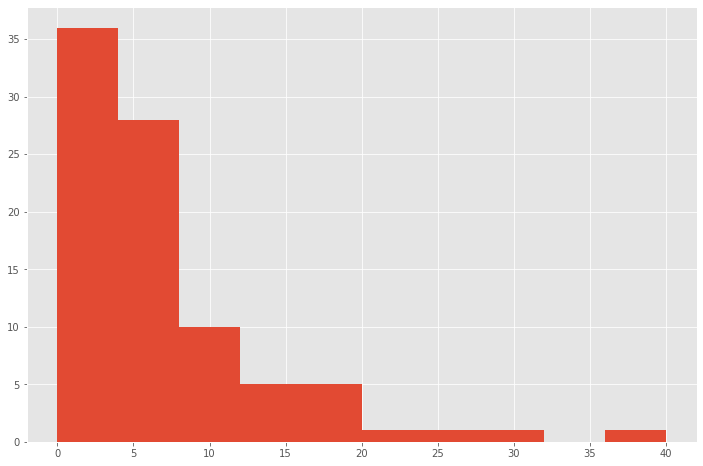

In [79]:
stud.absences.hist()
stud.absences.describe()

Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния. Напомним, что выбросом считаются такие значения, которые лежат вне рамок [median -1.5IQR : median+1.5IQR], где IQR = percentile(75) - percentile(25).

25й 2.0 75й 8.0 медиана= 4.0 IQR= 6.0 Разброс от -5.0 до 13.0


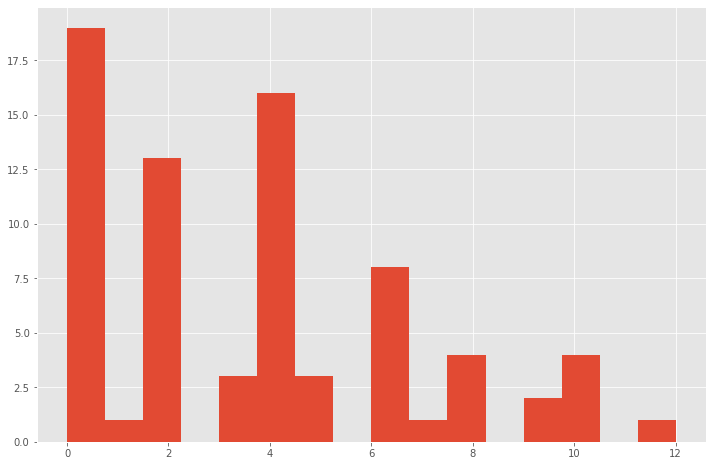

In [80]:
median_absences = stud.absences.median()
IQR_absences = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
print('25й', stud.absences.quantile(0.25), '75й', stud.absences.quantile(0.75), 'медиана=', median_absences, 'IQR=',
      IQR_absences, 'Разброс от', median_absences - 1.5*IQR_absences, 'до', median_absences + 1.5*IQR_absences)
stud.absences.loc[stud.absences.between(
    median_absences - 1.5*IQR_absences, median_absences + 1.5*IQR_absences)].hist(bins=16, label='IQR')

In [81]:
# очищаем таблицу от выбросов

stud = stud.loc[stud.absences.between(
    median_absences - 1.5*IQR_absences, median_absences + 1.5*IQR_absences)]
pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,19
4.0,16
2.0,13
6.0,8
8.0,4
10.0,4
3.0,3
5.0,3
9.0,2
7.0,1


In [82]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 4 to 391
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      75 non-null     object 
 1   sex         75 non-null     object 
 2   age         75 non-null     int64  
 3   address     75 non-null     object 
 4   fam_size    75 non-null     object 
 5   p_status    75 non-null     object 
 6   m_edu       75 non-null     float64
 7   f_edu       75 non-null     float64
 8   m_job       75 non-null     object 
 9   f_job       75 non-null     object 
 10  reason      75 non-null     object 
 11  guardian    75 non-null     object 
 12  traveltime  75 non-null     float64
 13  studytime   75 non-null     float64
 14  failures    75 non-null     float64
 15  schoolsup   75 non-null     object 
 16  famsup      75 non-null     object 
 17  paid        75 non-null     object 
 18  activities  75 non-null     object 
 19  nursery     75 non-null     ob

### Корреляционный анализ
Выясним, какие столбцы коррелируют с оценкой за экзамен. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

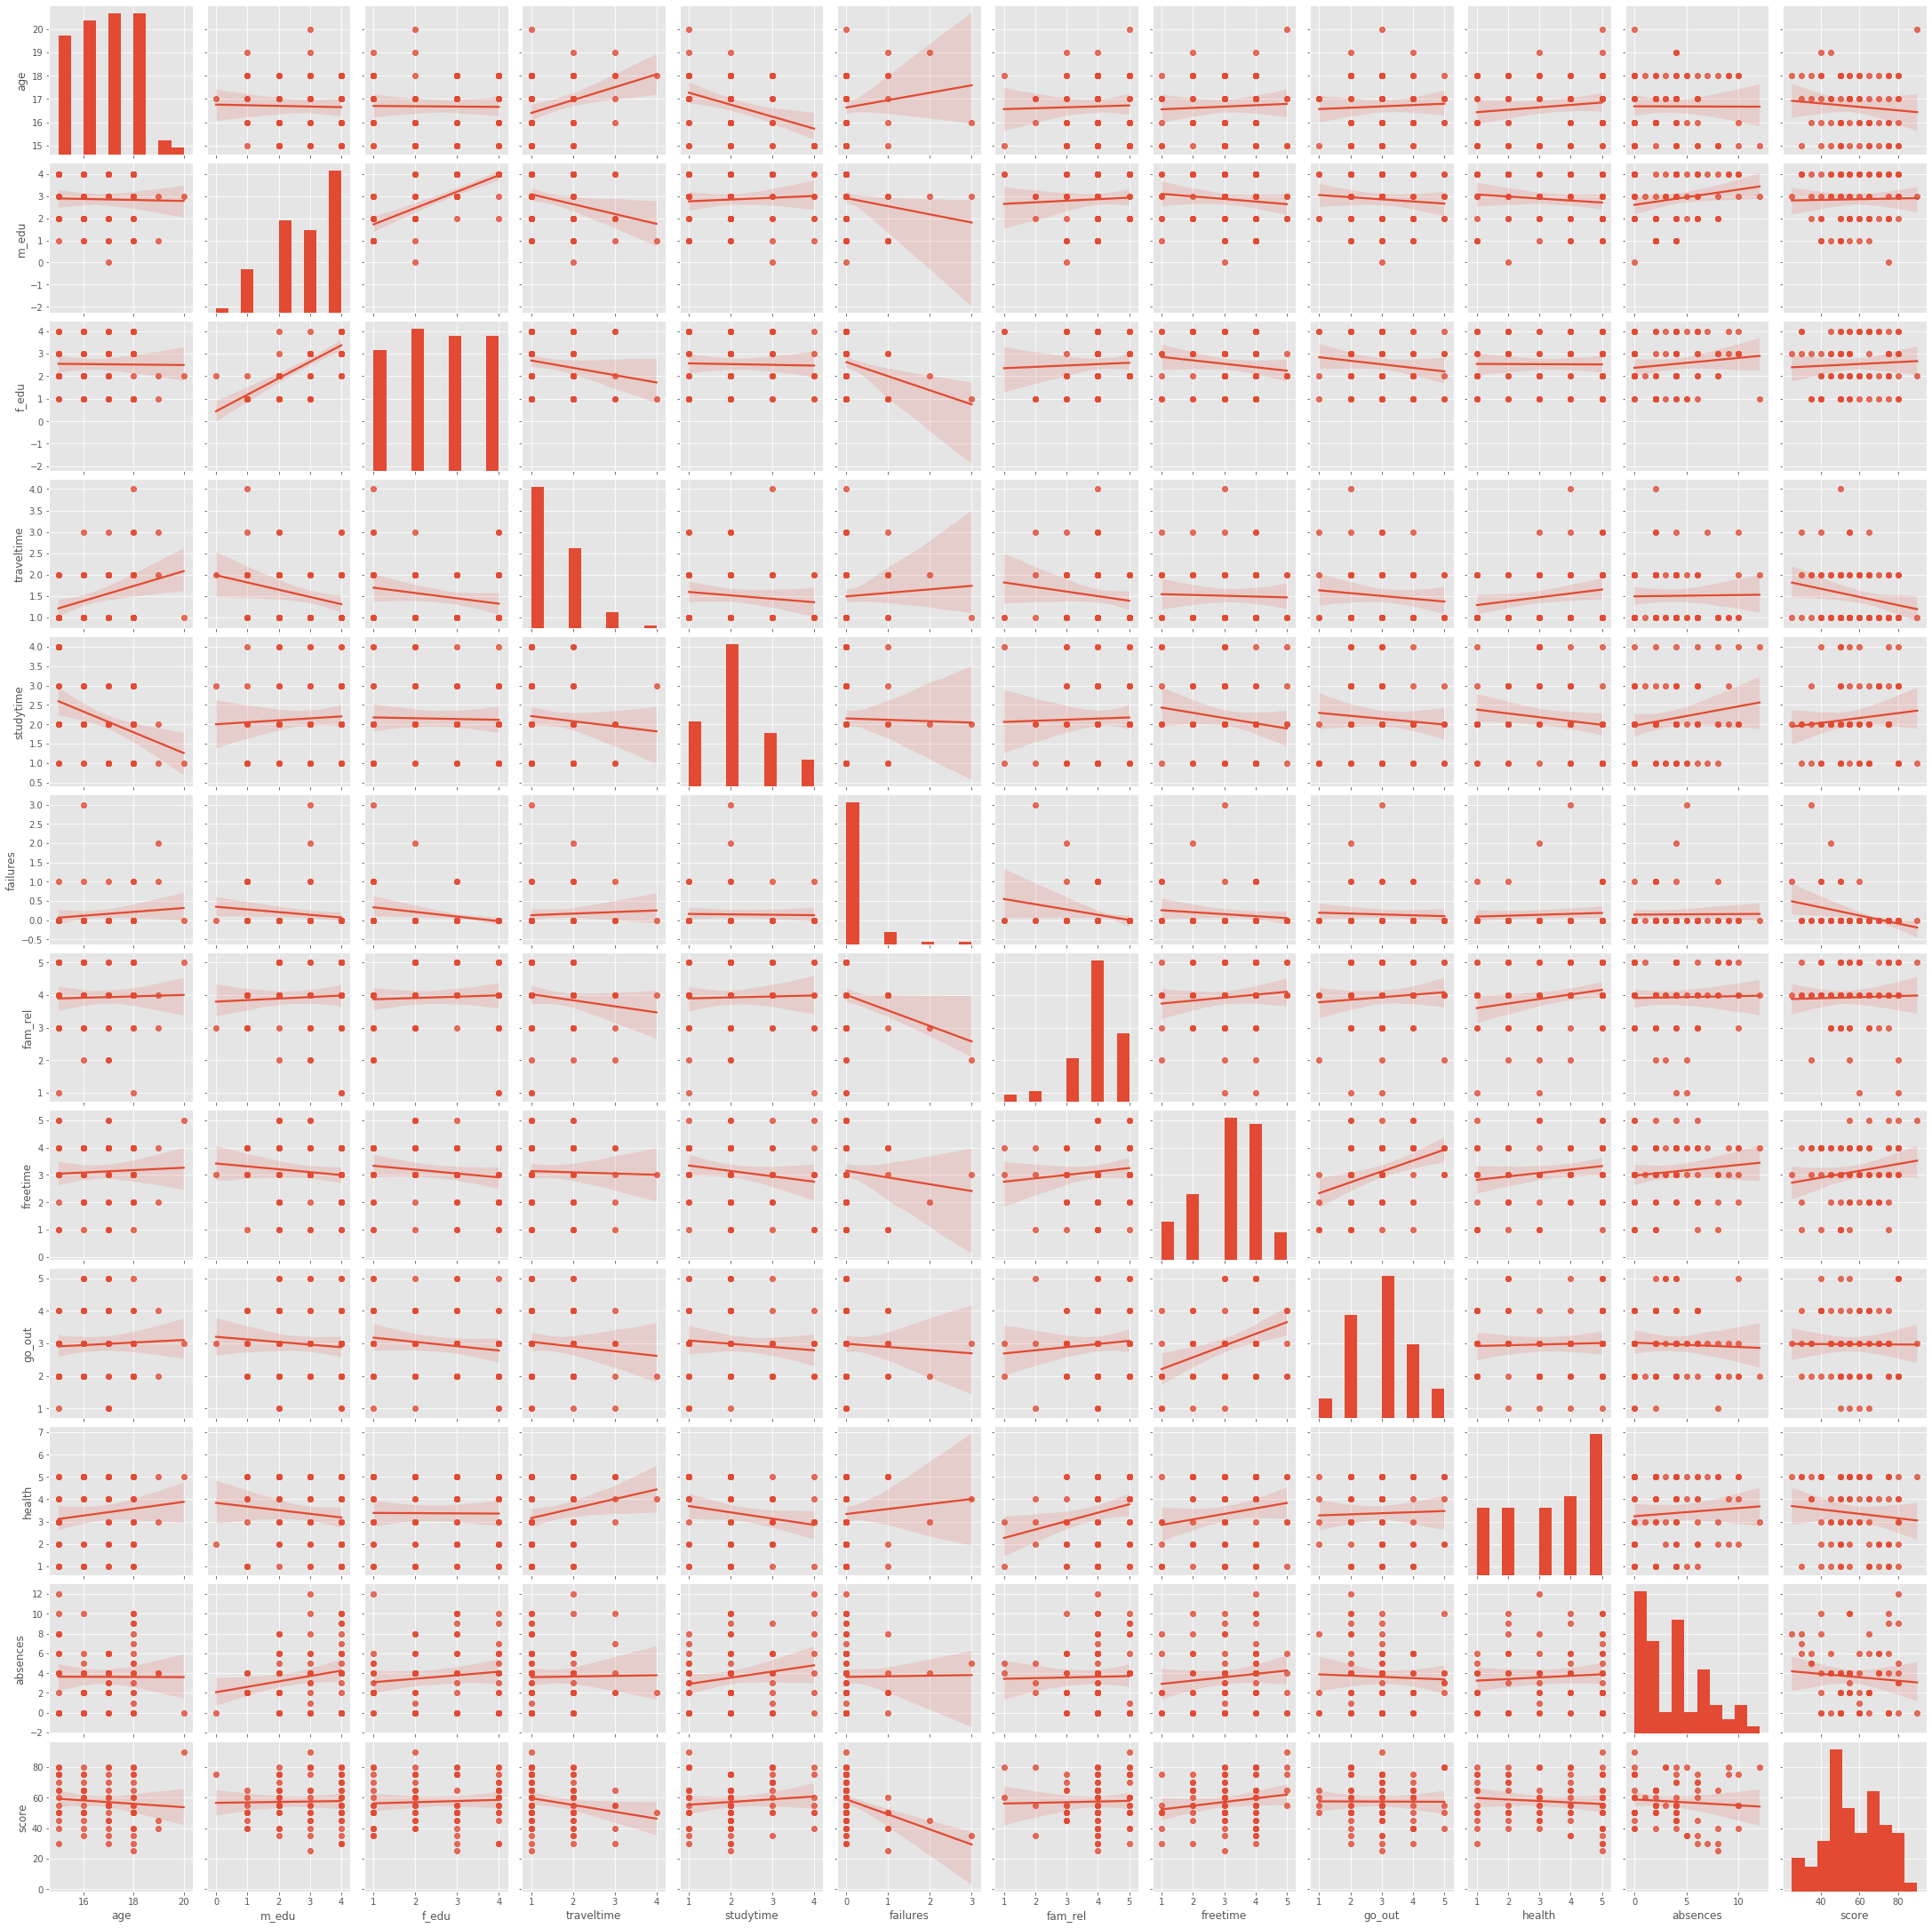

In [83]:
sns.pairplot(stud, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [84]:
stud.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,fam_rel,freetime,go_out,health,absences,score
age,1.000000,-0.025098,-0.011999,0.309465,-0.370506,0.126039,0.029337,0.050718,0.047633,0.126264,-0.003398,-0.091087
m_edu,-0.025098,1.000000,0.734589,-0.273763,0.063704,-0.160223,0.057302,-0.110535,-0.087545,-0.121823,0.194030,0.021586
f_edu,-0.011999,0.734589,1.000000,-0.200731,-0.025878,-0.273693,0.049439,-0.146742,-0.143808,-0.007665,0.124677,0.056641
traveltime,0.309465,-0.273763,-0.200731,1.000000,-0.102417,0.058044,-0.140847,-0.028889,-0.097073,0.196506,0.013791,-0.207122
studytime,-0.370506,0.063704,-0.025878,-0.102417,1.000000,-0.019417,0.029377,-0.163120,-0.086442,-0.166257,0.177194,0.106895
failures,0.126039,-0.160223,-0.273693,0.058044,-0.019417,1.000000,-0.254535,-0.113095,-0.046966,0.073012,0.009867,-0.321296
fam_rel,0.029337,0.057302,0.049439,-0.140847,0.029377,-0.254535,1.000000,0.106514,0.086429,0.229566,0.019728,0.027095
freetime,0.050718,-0.110535,-0.146742,-0.028889,-0.163120,-0.113095,0.106514,1.000000,0.378787,0.176180,0.115091,0.173548
go_out,0.047633,-0.087545,-0.143808,-0.097073,-0.086442,-0.046966,0.086429,0.378787,1.000000,0.033618,-0.041578,-0.004664
health,0.126264,-0.121823,-0.007665,0.196506,-0.166257,0.073012,0.229566,0.176180,0.033618,1.000000,0.076900,-0.099136


Самые слабоскоррелированные с показателем score переменные:
- уровень образования отца (f_edu), чем выше уровень образования отца, тем выше балл;
- уровень образования матери (m_edu), чем выше уровень образования матери, тем выше балл;
- goout — проведение времени с друзьями, чем больше с друзьями, тем ниже балл;
- famrel — семейные отношения, чем лучше, тем выше балл;
- absences — количество пропущенных занятий, чем больше пропустил, тем ниже балл.

### Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. 

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 30 самых частотных.

In [85]:
# номинативные переменные

print(non_numeric_cols)

['school' 'sex' 'address' 'fam_size' 'p_status' 'm_job' 'f_job' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


In [86]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

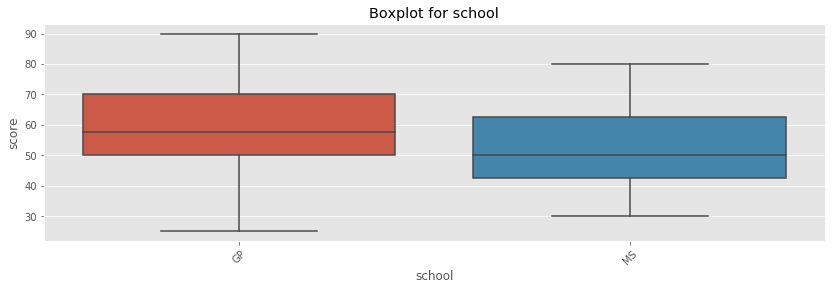

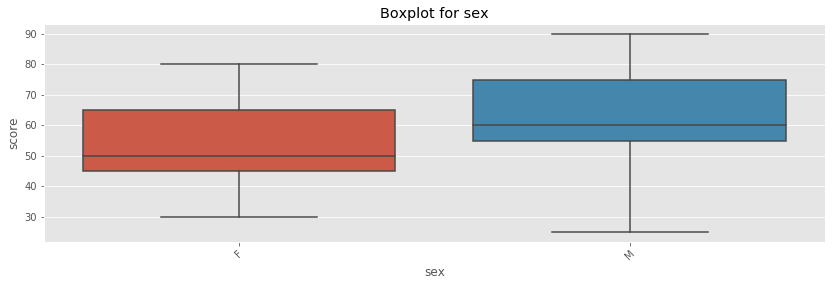

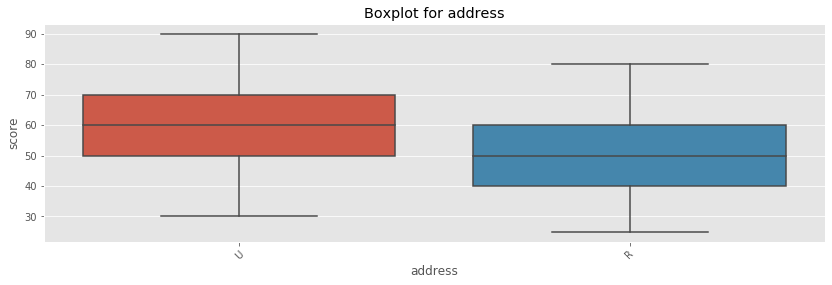

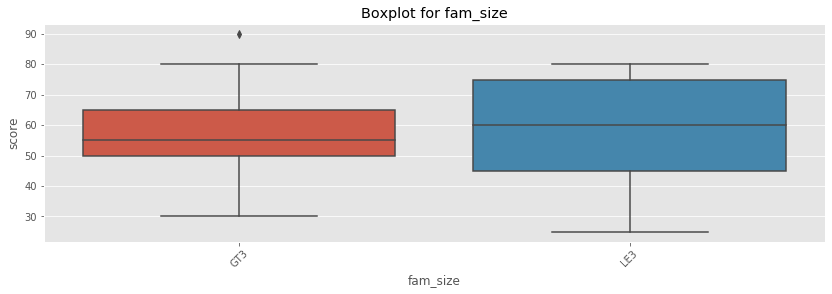

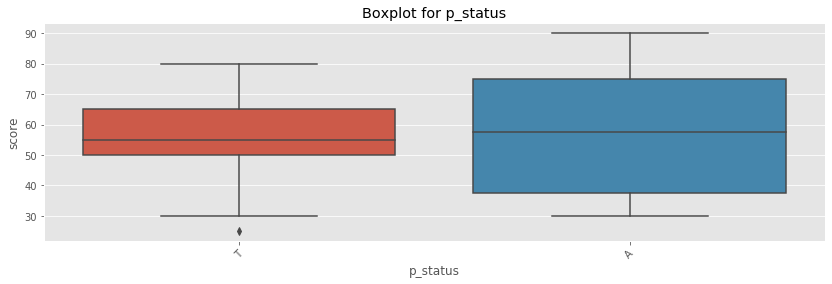

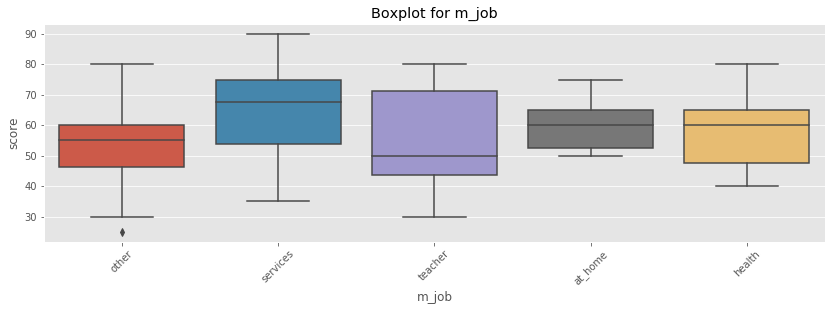

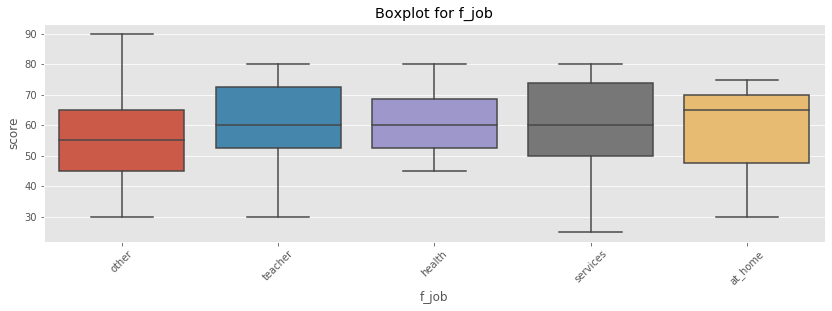

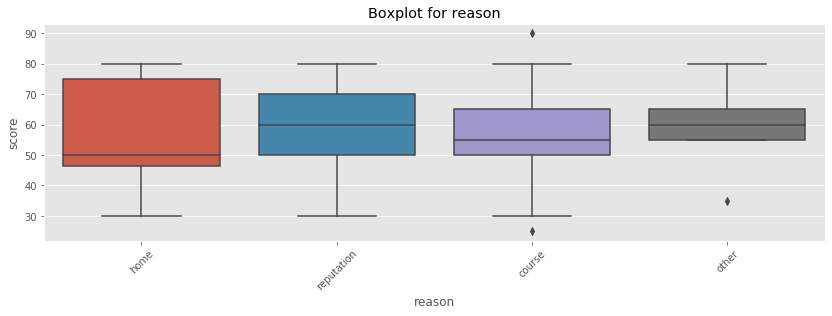

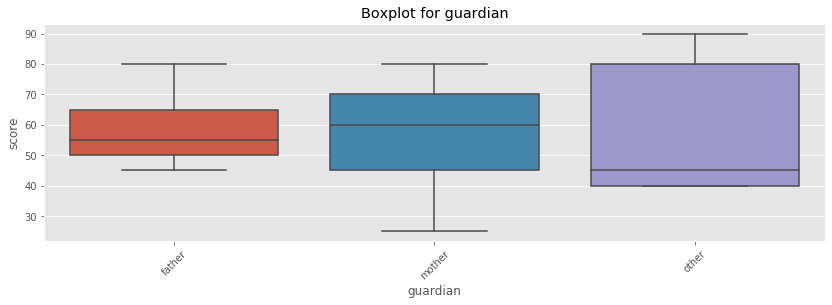

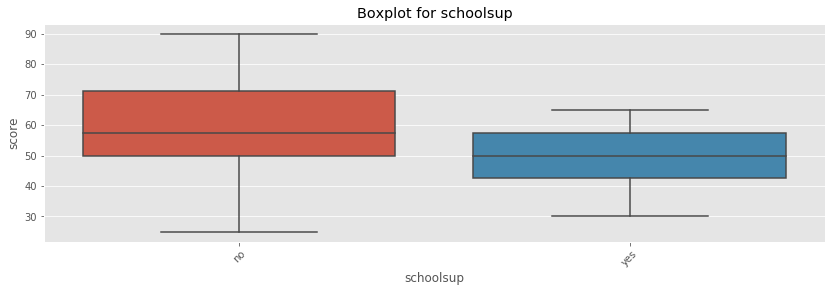

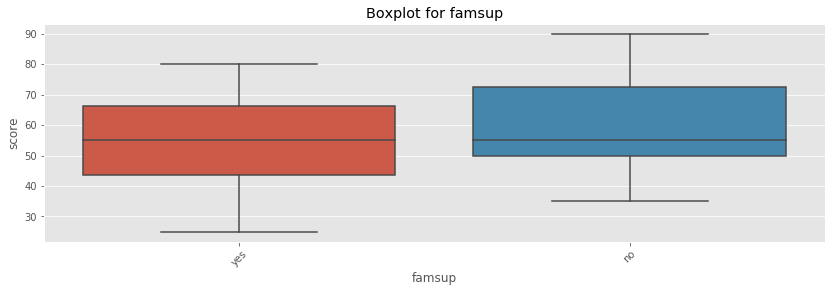

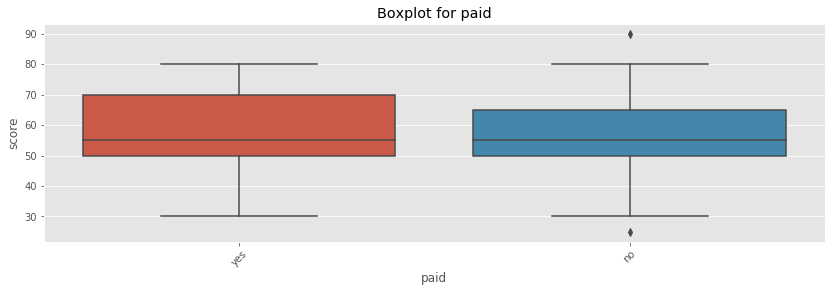

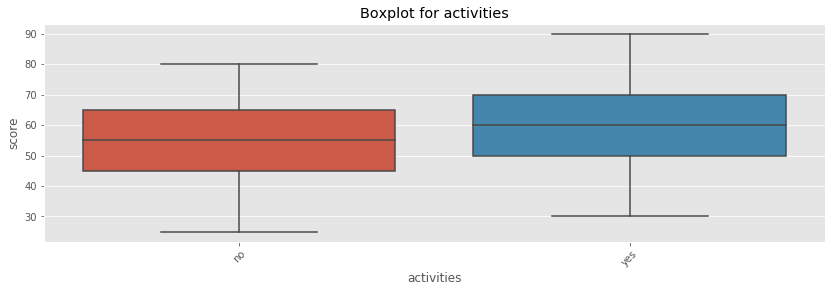

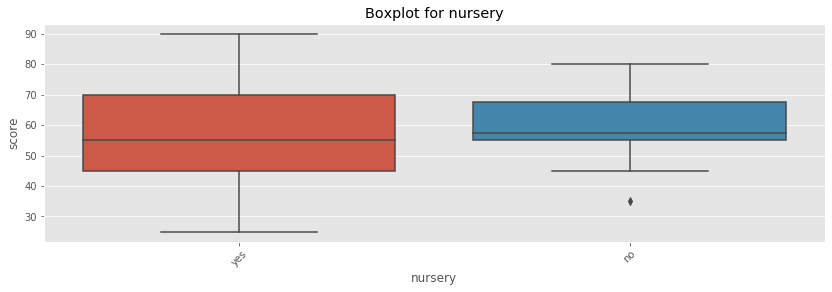

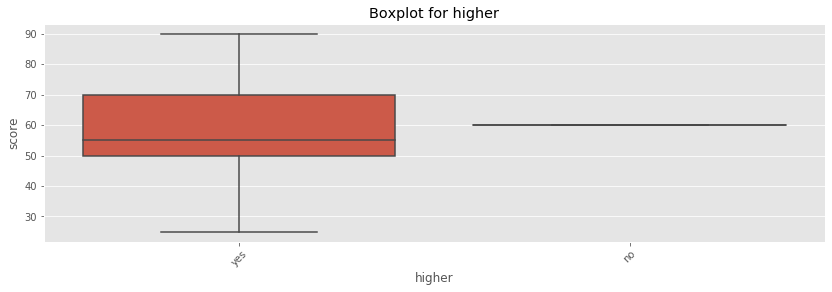

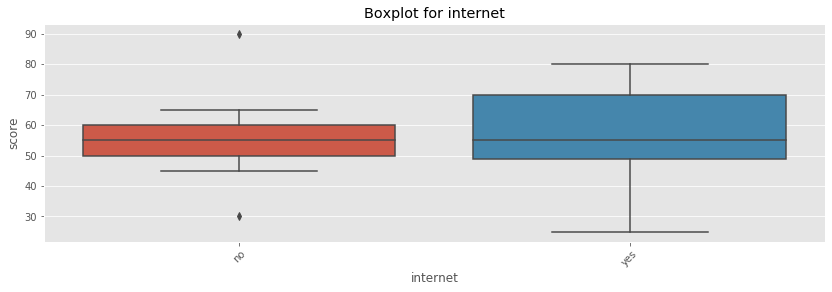

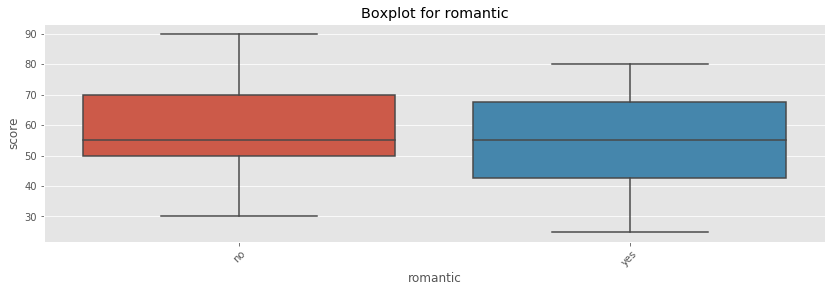

In [87]:
for col in ['school', 'sex', 'address', 'fam_size',
            'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что влияющие параметры: school, sex, fam_size, m_job, reason, higher, schoolsup

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [88]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [91]:
for col in ['school', 'sex', 'fam_size', 'm_job', 'f_job', 'reason', 'schoolsup', 'higher']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, влияние на успех оказывают: sex - пол; schoolsup — дополнительная образовательная поддержка, f_edu - уровень образования отца, m_edu - уровень образования матери; go_out — проведение времени с друзьями; fam_rel — семейные отношения;
absences — количество пропущенных занятий.

Оставим эти переменные в датасете для дальнейшего построения модели.

In [92]:
stud

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,MS,F,18,U,GT3,T,3.0,3.0,other,other,home,mother,1.0,2.0,0.0,no,no,yes,no,yes,yes,yes,yes,4.0,1.0,3.0,1.0,0.0,75.0
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,other,mother,2.0,1.0,0.0,no,no,no,yes,no,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


In [93]:
stud_for_model = stud.loc[:, ['sex', 'schoolsup', 'f_edu', 'm_edu', 'fam_rel', 'go_out', 'absences']]
stud_for_model.head(10)

,sex,schoolsup,f_edu,m_edu,fam_rel,go_out,absences
4,F,no,3.0,3.0,4.0,2.0,4.0
5,M,no,3.0,4.0,5.0,2.0,10.0
7,F,yes,4.0,4.0,4.0,4.0,6.0
10,F,no,4.0,4.0,3.0,3.0,0.0
14,M,no,2.0,2.0,4.0,2.0,0.0
16,F,no,4.0,4.0,3.0,3.0,6.0
23,M,no,2.0,2.0,5.0,4.0,0.0
39,F,yes,2.0,2.0,4.0,1.0,8.0
45,F,yes,3.0,4.0,5.0,2.0,8.0
50,F,no,2.0,2.0,4.0,3.0,2.0


Выводы
Итак, в результате EDA для анализа влияния жизни детей на экзаменационную оценку были получены следующие выводы:

- В данных достаточно мало пустых значений, столбец p_status был меньше всех заполнен значениями.
- Выбросы найдены только в столбцах с экзаменационными результатами (score), (age) - возраст  и (absences) - пропущенные занятия, что позволяет сделать вывод о том, что данные достаточно чистые.
- Положительная корреляция со (score) параметров уровня образования отца (f_edu) и матери (m_edu), чем выше уровень образования отца или матери, тем выше балл.
- Отрицательная корреляция со (score) параметров (goout) — проведение времени с друзьями, чем больше с друзьями, тем ниже балл; и (absences) — количество пропущенных занятий, чем больше пропустил, тем ниже балл.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex - пол; schoolsup — дополнительная образовательная поддержка, f_edu - уровень образования отца, m_edu - уровень образования матери; go_out — проведение времени с друзьями; fam_rel — семейные отношения; absences — количество пропущенных занятий.